In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv("C:/Users/ARAVINDH/Downloads/Fraud_check.csv")
df.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
df.shape

(600, 6)

In [17]:
df.loc[df["Taxable.Income"]>=30000,"Income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"Income"]="Risky"

In [19]:
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [ ]:
#Drop the Taxable income column

In [21]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [22]:
df.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0


In [24]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Income']

In [27]:
x= df.iloc[:,0:5]
y= df.iloc[:,5]

In [ ]:
#Correlation matrix

<AxesSubplot:>

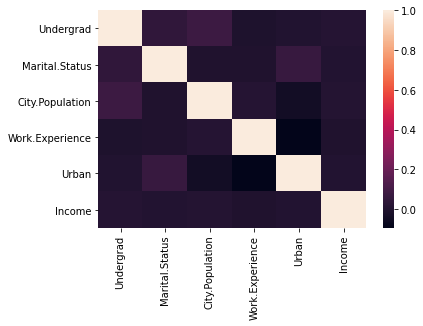

In [30]:
sns.heatmap(df.corr())

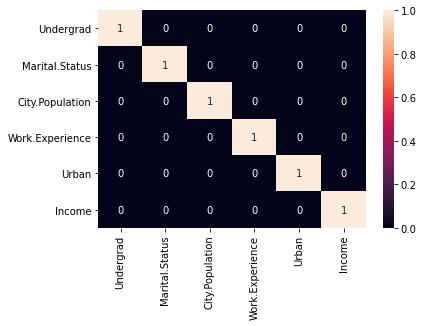

In [31]:
sns.heatmap(df.corr()>0.6, annot = True)
plt.show()

In [ ]:
#TRAIN AND TEST SPLIT

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify =y, random_state = 40)

In [ ]:
#Decision Tree plot

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

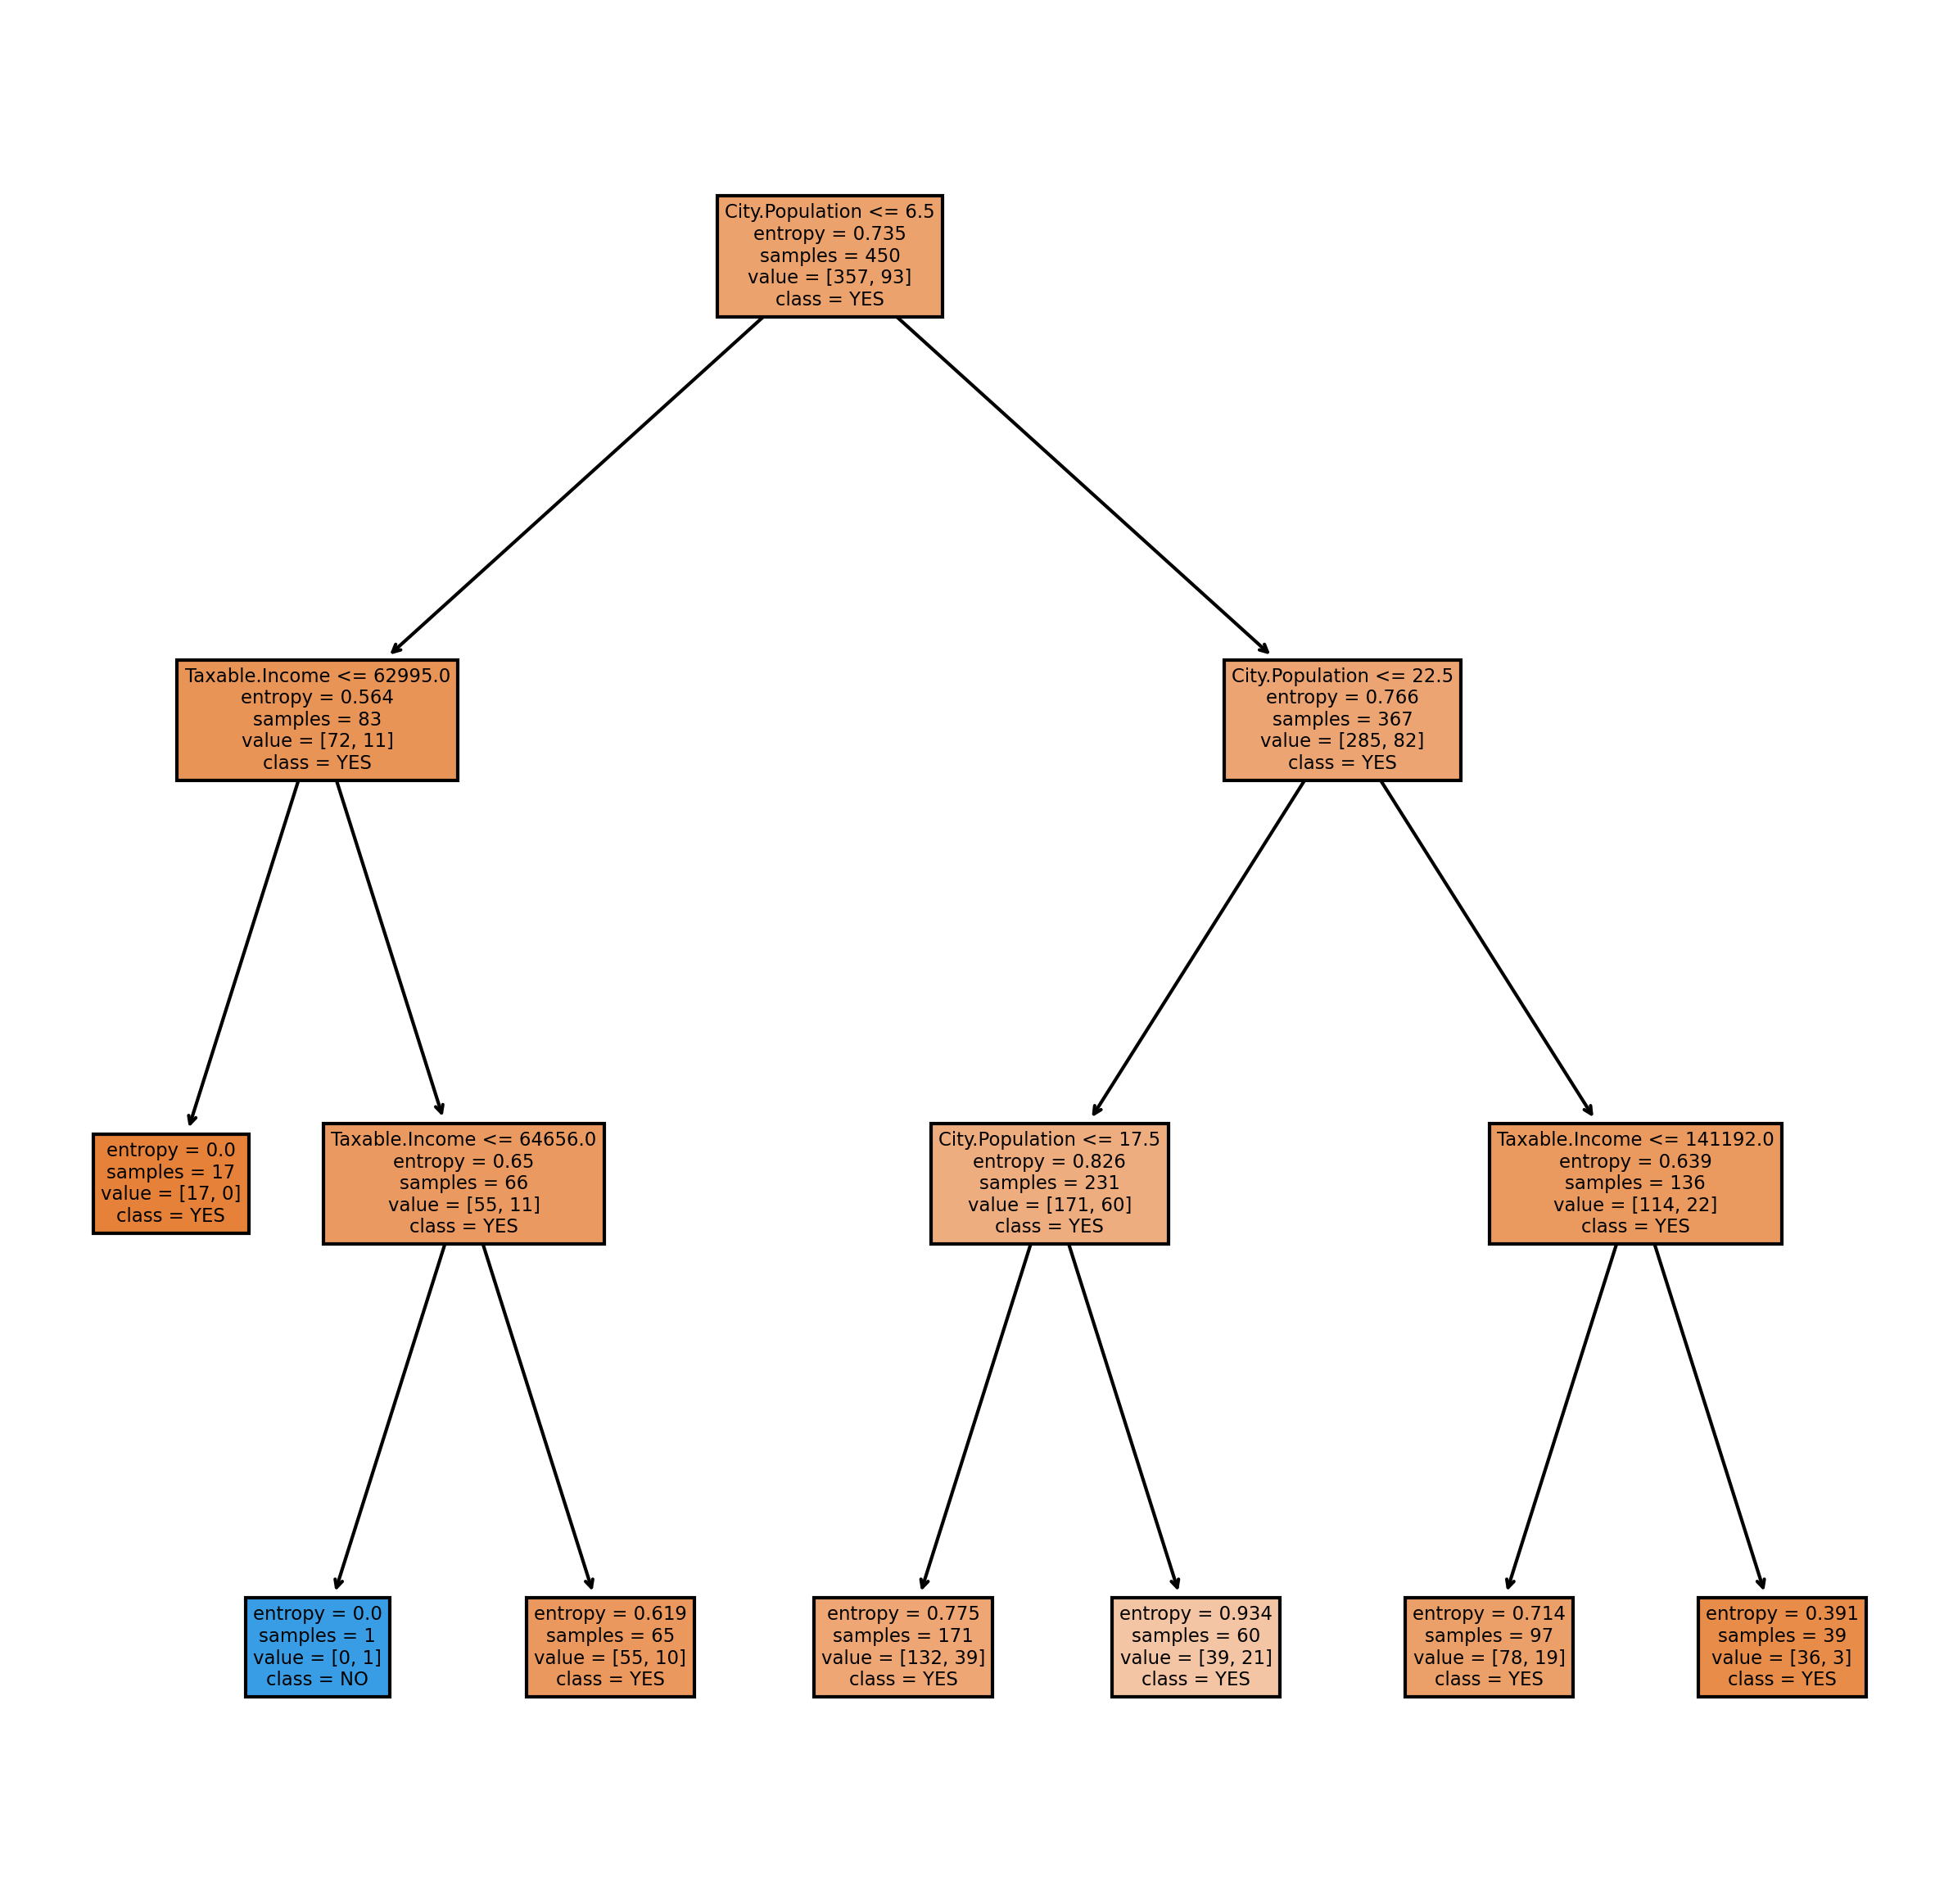

In [37]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [40]:
model.score(x_train, y_train)

0.7955555555555556

In [44]:
model.score(x_test, y_test)

0.7933333333333333

In [45]:
y_pred=model.predict(x_test)

In [ ]:
#'Good'&'Risky' columns

In [46]:
model.predict_proba(x_test)

array([[0.77192982, 0.22807018],
       [0.65      , 0.35      ],
       [0.84615385, 0.15384615],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [0.65      , 0.35      ],
       [0.80412371, 0.19587629],
       [0.92307692, 0.07692308],
       [0.80412371, 0.19587629],
       [0.77192982, 0.22807018],
       [0.84615385, 0.15384615],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [0.92307692, 0.07692308],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [0.65      , 0.35      ],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [0.77192982, 0.22807018],
       [1.        , 0.        ],
       [0.77192982, 0.22807018],
       [0.84615385, 0.15384615],
       [0.84615385, 0.15384615],
       [0.65      , 0.35      ],
       [0.84615385, 0.15384615],
       [0.84615385, 0.15384615],
       [0.84615385, 0.15384615],
       [0.

In [ ]:
#Confusion matrix

In [49]:
c= confusion_matrix(y_test, y_pred) 
c

array([[119,   0],
       [ 31,   0]], dtype=int64)